<a href="https://colab.research.google.com/github/Dimiboi1553/DCAI/blob/main/Linear_Regression_Model_For_Superconductors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch.nn.functional as F

DATASET

--------------------
Contributed by:
Hamidieh,Kam. (2018). Superconductivty Data. UCI Machine Learning Repository. https://doi.org/10.24432/C53P47.

#**PRE-PROCESSING DATA**

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Linear Regression Model for Superconductors/train.csv")
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [ ]:
du = pd.read_csv("/content/drive/MyDrive/unique_m.csv")
du

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31


**DATA PREPERATION**


In [15]:
y = df['critical_temp'].values
x = df.drop(['critical_temp','number_of_elements'], axis=1).values

duX = du.drop(['critical_temp','material'],axis=1)
duY = du['critical_temp'].values

result_df = pd.concat([df,duX],axis=1)
x = result_df.values

scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

# **CONVERT TO PYTORCH**

This is more pre-processing data


In [17]:
np.isnan(x).sum()

0

In [18]:
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)

# Check for zero division in x_std
x_std_nonzero = np.where(x_std == 0, 1, x_std)

# Normalize the features, replacing NaN values with 0
x = (x - x_mean) / x_std_nonzero
x[np.isnan(x)] = 0

In [19]:
y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std

In [20]:
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [21]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [22]:
num_features = x_train_tensor.shape[1]

weights = torch.empty((num_features, 1), requires_grad=True)
torch.nn.init.xavier_normal_(weights)

model = nn.Linear(num_features, 1)

criterion = nn.MSELoss()
bias = torch.randn(1, requires_grad=True)

# Hyperparameters
learning_rate = 0.01
num_epochs = 15000

optimizer = optim.Adam([weights, bias], lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x_train_tensor) + bias

    # Compute loss
    loss = criterion(y_pred, y_train_tensor)

    # Backward pass
    loss.backward()

    # Update weights and bias using the optimizer
    optimizer.step()

    # Zero gradients
    optimizer.zero_grad()

    # Print intermediate results
    # if epoch % 1000 == 0:
    #     print('Epoch {}: Predictions: {}, Actual: {}, Loss: {}'.format(
    #         epoch, y_pred[:5], y_train_tensor[:5], loss.item()))

# Print final weights and bias
print('Final weights:', weights.detach().numpy())
print('Final bias:', bias.item())

Final weights: [[ 0.05221178]
 [ 0.1865003 ]
 [ 0.07438689]
 [ 0.01563248]
 [ 0.10302341]
 [-0.0624628 ]
 [-0.18165407]
 [-0.10439822]
 [-0.21032536]
 [ 0.0433086 ]
 [ 0.13587442]
 [-0.01153791]
 [ 0.049009  ]
 [ 0.20975652]
 [-0.12739061]
 [-0.11260581]
 [ 0.18944444]
 [ 0.00440474]
 [-0.0724307 ]
 [ 0.0695578 ]
 [-0.05292711]
 [ 0.11101748]
 [-0.00207538]
 [ 0.04677578]
 [-0.00828844]
 [ 0.03778488]
 [-0.02908498]
 [ 0.04380289]
 [-0.12046663]
 [ 0.03904144]
 [ 0.2657551 ]
 [ 0.05708114]
 [-0.10049695]
 [ 0.03931341]
 [-0.0215157 ]
 [-0.10994623]
 [ 0.17454459]
 [ 0.06524667]
 [-0.10069527]
 [ 0.24373971]
 [ 0.04541926]
 [-0.04084952]
 [ 0.00160086]
 [-0.00681314]
 [-0.03576754]
 [ 0.16918525]
 [ 0.05444642]
 [ 0.26236352]
 [ 0.15710995]
 [ 0.10812274]
 [-0.02323145]
 [ 0.01923355]
 [ 0.10332774]
 [-0.10263263]
 [-0.13294147]
 [-0.0987126 ]
 [-0.04869832]
 [-0.10982365]
 [ 0.00357928]
 [ 0.27752215]
 [-0.1402572 ]
 [ 0.01070295]
 [-0.11415856]
 [-0.02252265]
 [-0.01245102]
 [-0.09180

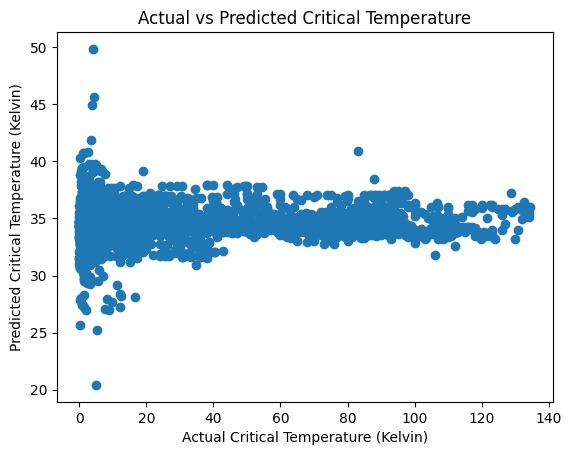

In [23]:
y_pred_test = torch.matmul(x_test_tensor, weights) + bias

# Plotting
plt.scatter(y_test_tensor.numpy(), y_pred_test.detach().numpy())
plt.xlabel('Actual Critical Temperature (Kelvin)')
plt.ylabel('Predicted Critical Temperature (Kelvin)')
plt.title('Actual vs Predicted Critical Temperature')
plt.show()

In [25]:
# Make predictions on x_test
with torch.no_grad():
    y_pred_test = torch.matmul(torch.tensor(x_test, dtype=torch.float32), weights) + bias

# Convert to NumPy array
y_pred_test = y_pred_test.detach().numpy()

mse_test = ((y_pred_test - y_test)**2).mean()
rmse_test = np.sqrt(mse_test)
mae_test = np.abs(y_pred_test - y_test).mean()

print(f'MSE on test set: {mse_test}')
print(f'RMSE on test set: {rmse_test}')
print(f'MAE on test set: {mae_test}')


MSE on test set: 1153.3387571664612
RMSE on test set: 33.9608415261822
MAE on test set: 29.126736906326705
